In [28]:
from glob import glob
import cv2

img_paths = sorted(glob('captchaTrainingSet/imagesTraining/*.gif'))
img_paths[:5]

['captchaTrainingSet/imagesTraining/test100.gif',
 'captchaTrainingSet/imagesTraining/test101.gif',
 'captchaTrainingSet/imagesTraining/test102.gif',
 'captchaTrainingSet/imagesTraining/test103.gif',
 'captchaTrainingSet/imagesTraining/test104.gif']

In [29]:
from shutil import rmtree
import os

def create_new_folder(folder_name):
    if os.path.exists(folder_name):
        rmtree(folder_name)
    os.mkdir(folder_name)

def remove_noise(img_path):
    img_name = img_path.split('/')[-1].split('.')[0]
    img = cv2.imread(img_path)
    for i in range(50):
        for j in range(170):
            if sum(img[i][j]) >= 170*3: 
                img[i][j] = [255, 255, 255]
    cv2.imwrite('noise-removed/{}.jpg'.format(img_name), img)

create_new_folder('noise-removed')
for img_path in img_paths:
    remove_noise(img_path)

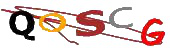

In [30]:
from PIL import Image
img_pil = Image.open('noise-removed/test100.jpg')
img_pil

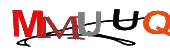

In [64]:
img_pil = Image.open('noise-removed/test50.jpg')
img_pil

In [97]:
import numpy as np

threshold = 80
colors = []
img = cv2.imread('noise-removed/test50.jpg')
d = {}
for i in img:
    for j in i:
        if sum(j) > 200*3: 
            continue
        if not colors:
            colors.append(j)
            c_name = ' '.join([str(c) for c in j])
            print(j, c_name)
            d[c_name] = 1
        else:
            found = False
            for k in colors:
                if abs(sum(j) - sum(k)) < threshold:
                    c_name = ' '.join([str(c) for c in k])
                    d[c_name] = d.get(c_name, 0) + 1
                    found = True
                    break
            if not found:
                colors.append(j)
                c_name = ' '.join([str(c) for c in j])
                d[c_name] = d.get(c_name, 0) + 1
colors
        

[46 46 46] 46 46 46


[array([46, 46, 46], dtype=uint8),
 array([10, 10, 10], dtype=uint8),
 array([83, 83, 83], dtype=uint8),
 array([122, 111, 184], dtype=uint8),
 array([139, 132, 236], dtype=uint8),
 array([ 48,  95, 186], dtype=uint8)]

In [88]:
d

{'10 10 10': 396,
 '26 26 26': 28,
 '39 26 166': 250,
 '46 46 46': 67,
 '60 60 60': 22}